In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import RobustScaler

In [15]:
drop_cols = [
             "Machine4.Temperature1.C.Actual", "Machine4.Temperature2.C.Actual", "Machine4.Temperature3.C.Actual",
             "Machine4.Temperature4.C.Actual", "Machine4.Temperature5.C.Actual"
             ]

df0_indexed = pd.read_csv("../Data1/df0_indexed_stage2.csv")
X0, y0 = df0_indexed.iloc[:, 72:79], df0_indexed.iloc[:, 78:79]
X0_reduced = X0.copy()
X0_reduced.drop(drop_cols, axis=1, inplace=True)
y0_Actual = y0.iloc[:, 0]


In [16]:
X0_transformed = RobustScaler().fit_transform(X0_reduced, y0_Actual)

In [129]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0_transformed, y0_Actual, test_size=0.3, random_state=42)

In [130]:
RanFo = RandomForestRegressor(max_depth=8)
RanFo.fit(X0_train, y0_train)

y0_pred = RanFo.predict(X0_test)

RandomForestRegressor(max_depth=8)

<Figure size 1080x345.6 with 0 Axes>

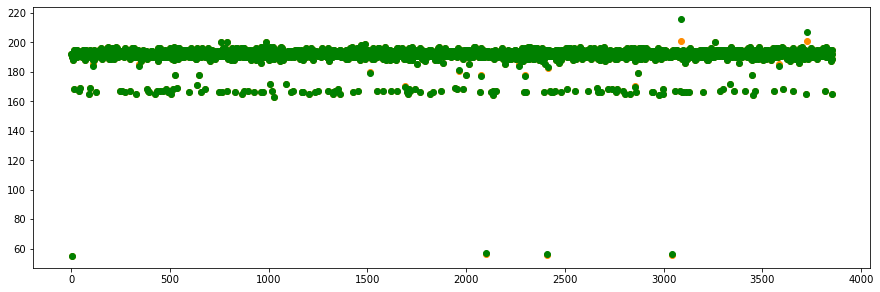

In [131]:
# test 데이터
plt.figure(figsize=(15,4.8))
plt.scatter(np.arange(len(X0_test)), y0_pred, c="darkorange")
plt.scatter(np.arange(len(X0_test)), y0_test, c="green")

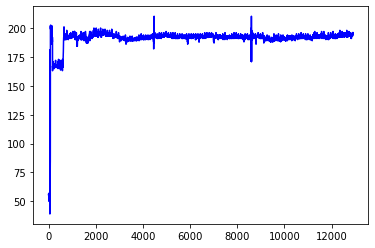

In [10]:
plt.plot(RanFo.predict(X0_transformed), "b")

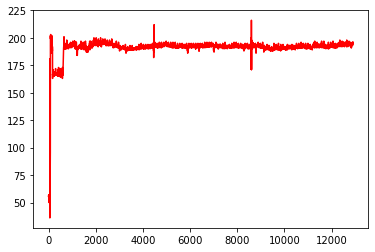

In [11]:
plt.plot(y0_Actual, "r")

In [12]:
mse = mean_squared_error(y0_test, y0_pred)
rmse = np.sqrt(mse)

mse
rmse

0.01707642581542763

0.1306767990709431

In [13]:
r2_score(y0_test, y0_pred)

0.9998916028843943